# Necessary imports

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils

from torch import nn, optim
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')

# Reading training data 

In [2]:
train_data = pd.read_csv('training.csv')

# Data Loading 

In [3]:
from dataset import FaceKeypointsDataset

In [4]:
train_df=train_data.dropna()

In [5]:
from transforms import Normalize, ToTensor, RandomHorizontalFlip
train_transform=transforms.Compose([RandomHorizontalFlip(p=1.0),Normalize(),ToTensor()])
trainset= FaceKeypointsDataset(train_df,transform=train_transform)

In [6]:
from dataloader import prepare_train_valid_loaders
train_loader, valid_loader= prepare_train_valid_loaders(trainset)

# Training 

In [7]:
from train import train

In [8]:
criterion = nn.MSELoss()

In [9]:
from model import CNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN(outputs=30)
model = model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0035)

In [10]:
t_l,v_l=train(train_loader,valid_loader,model,criterion,optimizer,n_epochs=50,saved_model="CNN.pt")

Epoch: 1 	Training Loss: 49.985766 	Validation Loss: 50.498857
Validation loss decreased (inf --> 50.498857).  Saving model ...
Epoch: 2 	Training Loss: 49.070453 	Validation Loss: 42.916226
Validation loss decreased (50.498857 --> 42.916226).  Saving model ...
Epoch: 3 	Training Loss: 27.971894 	Validation Loss: 6.587894
Validation loss decreased (42.916226 --> 6.587894).  Saving model ...
Epoch: 4 	Training Loss: 14.320083 	Validation Loss: 8.417363
Epoch: 5 	Training Loss: 9.595877 	Validation Loss: 5.099466
Validation loss decreased (6.587894 --> 5.099466).  Saving model ...
Epoch: 6 	Training Loss: 7.623836 	Validation Loss: 3.610826
Validation loss decreased (5.099466 --> 3.610826).  Saving model ...
Epoch: 7 	Training Loss: 6.532960 	Validation Loss: 3.448467
Validation loss decreased (3.610826 --> 3.448467).  Saving model ...
Epoch: 8 	Training Loss: 6.200264 	Validation Loss: 3.678866
Epoch: 9 	Training Loss: 5.851681 	Validation Loss: 3.328769
Validation loss decreased (3.448

# Plot of training and Validation Loss 

Text(0, 0.5, 'Loss')

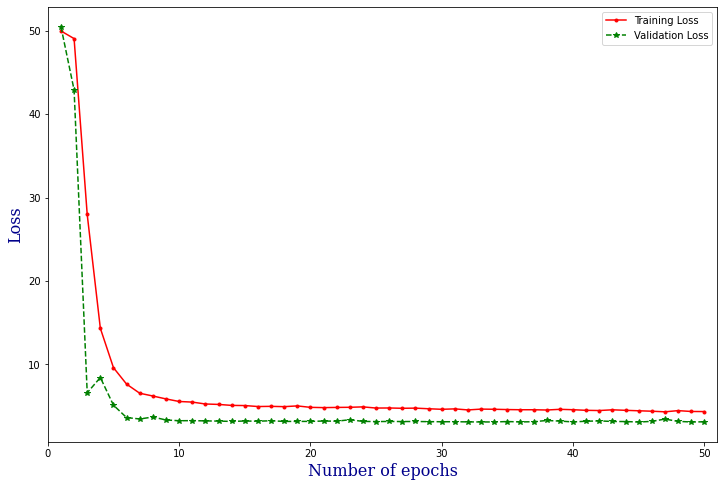

In [11]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,51),t_l,"r.-",label="Training Loss")
plt.plot(np.arange(1,51),v_l,"g*--",label='Validation Loss')
plt.legend()
plt.xlim((0,51))
plt.xlabel("Number of epochs",fontdict={'family': 'serif','color': 'darkBlue','weight': 'normal','size': 16,})
plt.ylabel("Loss",fontdict={'family': 'serif','color': 'darkBlue','weight': 'normal','size': 16,})

# for different learning rate for adam optimizer use these two functions

### first make a directory with name adam_mse_lr100

In [12]:
# def func(x,y,name):
#     df=pd.DataFrame({"train_loss":x,"valid_loss":y})
#     return df.to_csv(name,index=False)
# def differentlr(n):
#     '''
#     n: number of learning rates starting from 0.001 and at an interval of 0.001
#     '''
#     for i in range(n):
#         optimizer=optim.Adam(model.parameters(),lr=(i+1)/1000)
#         t_l,v_l=train(train_loader,valid_loader,model,criterion,optimizer,n_epochs=50,saved_model="CNN.pt")
#         nem="adam_mse_lr100/lr_"+str((i+1)/1000)+".csv"
#         func(t_l,v_l,nem)
# difflr(20)